In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
import matplotlib.patches as mpatches
from matplotlib import pyplot as plt
import random

import sys
import matplotlib
import sklearn
import numpy
import keras
import tensorflow as tf 
from keras.layers import Dense, Flatten, BatchNormalization, Dropout, Convolution2D, MaxPool2D
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
print('Versão Python ', sys.version)
print('Versão Numpy ', numpy.version.version)
print('Versão Pandas ', pd.__version__)
print('Versão Matplotlib ', matplotlib.__version__)
print('Versão Sklearn ', sklearn.__version__)
print('Versão Keras', keras.__version__)
print('Versão TensorFlow', tf.__version__)

Versão Python  3.6.10 |Anaconda, Inc.| (default, Jan  7 2020, 15:18:16) [MSC v.1916 64 bit (AMD64)]
Versão Numpy  1.17.4
Versão Pandas  0.25.3
Versão Matplotlib  3.1.2
Versão Sklearn  0.22.1
Versão Keras 2.3.1
Versão TensorFlow 2.0.0


#### Importando os dados

In [3]:
IdLookupTable = pd.read_csv('IdLookupTable.csv')
SampleSubmission = pd.read_csv('SampleSubmission.csv')
training = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [5]:
type(IdLookupTable)

pandas.core.frame.DataFrame

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [6]:
IdLookupTable.dtypes

RowId            int64
ImageId          int64
FeatureName     object
Location       float64
dtype: object

In [7]:
SampleSubmission.dtypes

RowId       int64
Location    int64
dtype: object

In [8]:
training.dtypes

left_eye_center_x            float64
left_eye_center_y            float64
right_eye_center_x           float64
right_eye_center_y           float64
left_eye_inner_corner_x      float64
left_eye_inner_corner_y      float64
left_eye_outer_corner_x      float64
left_eye_outer_corner_y      float64
right_eye_inner_corner_x     float64
right_eye_inner_corner_y     float64
right_eye_outer_corner_x     float64
right_eye_outer_corner_y     float64
left_eyebrow_inner_end_x     float64
left_eyebrow_inner_end_y     float64
left_eyebrow_outer_end_x     float64
left_eyebrow_outer_end_y     float64
right_eyebrow_inner_end_x    float64
right_eyebrow_inner_end_y    float64
right_eyebrow_outer_end_x    float64
right_eyebrow_outer_end_y    float64
nose_tip_x                   float64
nose_tip_y                   float64
mouth_left_corner_x          float64
mouth_left_corner_y          float64
mouth_right_corner_x         float64
mouth_right_corner_y         float64
mouth_center_top_lip_x       float64
m

In [9]:
test.dtypes

ImageId     int64
Image      object
dtype: object

#### Verificando informações sobre os datasets

In [4]:
IdLookupTable.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 4 columns):
RowId          27124 non-null int64
ImageId        27124 non-null int64
FeatureName    27124 non-null object
Location       0 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 847.8+ KB


In [5]:
SampleSubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27124 entries, 0 to 27123
Data columns (total 2 columns):
RowId       27124 non-null int64
Location    27124 non-null int64
dtypes: int64(2)
memory usage: 423.9 KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1783 entries, 0 to 1782
Data columns (total 2 columns):
ImageId    1783 non-null int64
Image      1783 non-null object
dtypes: int64(1), object(1)
memory usage: 28.0+ KB


In [7]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
left_eye_center_x            7039 non-null float64
left_eye_center_y            7039 non-null float64
right_eye_center_x           7036 non-null float64
right_eye_center_y           7036 non-null float64
left_eye_inner_corner_x      2271 non-null float64
left_eye_inner_corner_y      2271 non-null float64
left_eye_outer_corner_x      2267 non-null float64
left_eye_outer_corner_y      2267 non-null float64
right_eye_inner_corner_x     2268 non-null float64
right_eye_inner_corner_y     2268 non-null float64
right_eye_outer_corner_x     2268 non-null float64
right_eye_outer_corner_y     2268 non-null float64
left_eyebrow_inner_end_x     2270 non-null float64
left_eyebrow_inner_end_y     2270 non-null float64
left_eyebrow_outer_end_x     2225 non-null float64
left_eyebrow_outer_end_y     2225 non-null float64
right_eyebrow_inner_end_x    2270 non-null float64
right_eyebrow_inner_end_y 

#### Visualizando os três primeiros registros de cada dataset

In [8]:
IdLookupTable.head(3)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN


In [9]:
SampleSubmission.head(3)

,RowId,Location
0,1,0
1,2,0
2,3,0


In [10]:
test.head(3)

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...


#### Removendo a coluna "Image" do dataset de treino 

In [11]:
training_no_image = training.drop(['Image'], axis=1)

#### Visualizando os três primeiros e os cinco últimos registros do dataset de treino 

In [12]:
training_no_image.head(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,44.420571,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,48.206298,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,47.557263,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,51.885078,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,43.299534,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166


In [13]:
training_no_image.tail(5)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_x,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y
7044,67.402546,31.842551,29.746749,38.632942,NaN,NaN,NaN,NaN,NaN,NaN,...,48.265961,67.029093,NaN,NaN,NaN,NaN,NaN,NaN,50.426637,79.683921
7045,66.134400,38.365501,30.478626,39.950198,NaN,NaN,NaN,NaN,NaN,NaN,...,47.910346,66.626011,NaN,NaN,NaN,NaN,NaN,NaN,50.287397,77.983023
7046,66.690732,36.845221,31.666420,39.685042,NaN,NaN,NaN,NaN,NaN,NaN,...,49.462572,67.515161,NaN,NaN,NaN,NaN,NaN,NaN,49.462572,78.117120
7047,70.965082,39.853666,30.543285,40.772339,NaN,NaN,NaN,NaN,NaN,NaN,...,50.754202,66.724988,NaN,NaN,NaN,NaN,NaN,NaN,50.065186,79.586447
7048,66.938311,43.424510,31.096059,39.528604,NaN,NaN,NaN,NaN,NaN,NaN,...,47.069250,73.033339,NaN,NaN,NaN,NaN,NaN,NaN,45.900480,82.773096


#### Verificando se existem dados ausentes no dataset de treino

In [14]:
training.isnull().any().value_counts()

True     28
False     3
dtype: int64

#### Como visto acima existem 28 features com dados ausentes no dataset de treino, vamos verificar quais são elas

In [15]:
training.isnull().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

#### Verificação do número de registros e colunas

In [16]:
training.shape

(7049, 31)

#### Remoção de registros com dados faltantes

In [17]:
training = training.dropna()

#### Verificação do número de registros e colunas após aplicação de dropna

In [18]:
training.shape

(2140, 31)

#### Visualização do tipo de dado da feature "Image"

In [19]:
type(training['Image'])

pandas.core.series.Series

#### Visualização do tipo de dado do coneteúdo da feature "Image"

In [20]:
type(training['Image'][0])

str

#### Visualização os dados presentes na feature "Image"

In [21]:
training['Image'][0][0:100]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 '

#### Visualização do tipo de dado presente na feature "Image"

In [22]:
for i in range(3):
    print(training['Image'][0][i], ' tipo de dado:', type(training['Image'][0][i]))

2  tipo de dado: <class 'str'>
3  tipo de dado: <class 'str'>
8  tipo de dado: <class 'str'>


#### Convertendo os dados de cada imagem para uma matriz de inteiros e remodelando para uma matriz de dimsão 96x96

In [23]:
training['Image'] = training['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

#### Visualização do tipo de dado da feature "Image"

In [24]:
type(training['Image'])

pandas.core.series.Series

#### Visualização do tipo de dado e dos dados presentes na feature "Image" após a conversão

In [25]:
type(training['Image'][0])

numpy.ndarray

#### Visualização os dados presentes na feature "Image"

In [26]:
training['Image'][0][0:100]

array([[238, 236, 237, ..., 250, 250, 250],
       [235, 238, 236, ..., 249, 250, 251],
       [237, 236, 237, ..., 251, 251, 250],
       ...,
       [186, 183, 181, ...,  52,  57,  60],
       [189, 188, 207, ...,  61,  69,  78],
       [191, 184, 184, ...,  70,  75,  90]])

#### Visualização do tipo de dado presente na feature "Image"

In [27]:
for i in range(3):
    print(training['Image'][0][i], ' tipo de dado:', type(training['Image'][0][i]))

[238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122
 104  92  79  73  74  73  73  74  81  74  60  64  75  86  93 102 100 105
 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147
 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104
  98  90  82  78  85  88  86  80  77  87 108 111 115 128 133 188 242 252
 250 248 251 250 250 250]  tipo de dado: <class 'numpy.ndarray'>
[235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103
  93  78  68  73  75  75  72  75  70  61  66  77  91  96 106 108 113 120
 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149
 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112
 104  97  87  78  79  83  85  83  75  75  89 109 111 117 117 130 194 243
 251 249 250 249 250 251]  tipo de dado: <class 'numpy.ndarray'>
[237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106  95
  81  68  70  73  73  72  73  69  65  74  82  94 103 110 111 119 12

#### Visualizando auma imagem em  uma posição aleatória

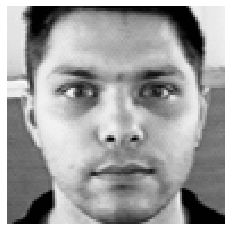

In [28]:
plt.imshow(training['Image'][random.randint(0, 2139)].reshape(96,96), cmap='gray')
plt.axis('off')
plt.show()

#### Visualizando os pontos referente a feature coordenadas do centro do olho esquerdo ou left_eye_center

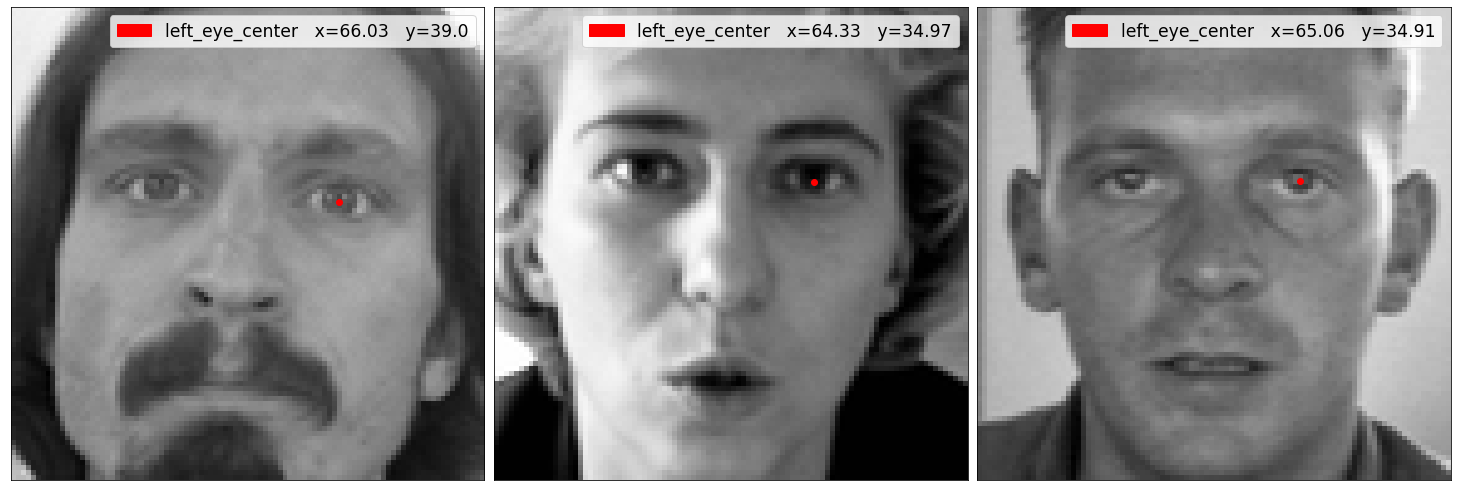

In [122]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.02, wspace=0.02)

for i in range(3):
    fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    red_patch = mpatches.Patch(color='red', label='left_eye_center   x='
                       + str(round(training.loc[i][0], 2)) 
                       +'   y=' + str(round(training.loc[i][1], 2)))
    plt.imshow(training['Image'][i], cmap='gray')
    plt.legend(handles=[red_patch], fontsize='xx-large')
    plt.plot(training.loc[i][0], training.loc[i][1], 'ro')
plt.show()

#### Visualizando os pontos referente a feature coordenadas do centro do olho direito ou right_eye_center

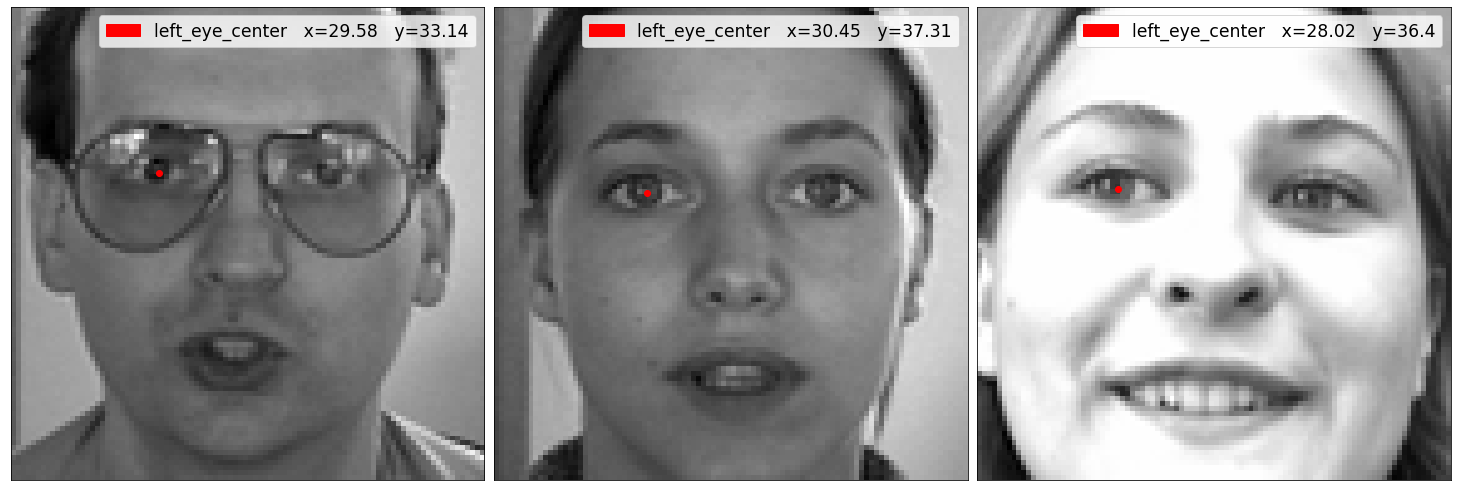

In [123]:

fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.02, wspace=0.02)
x = 0
for i in range(3):
    x += 6
    fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    red_patch = mpatches.Patch(color='red', label='left_eye_center   x='
                               + str(round(training.loc[x][2], 2)) 
                               +'   y=' + str(round(training.loc[x][3], 2)))
    plt.imshow(training['Image'][x], cmap='gray')
    plt.legend(handles=[red_patch], fontsize='xx-large')
    plt.plot(training.loc[x][2], training.loc[x][3], 'ro')
plt.show()

#### Visualizando os pontos referente a feature coordenadas da ponta do nariz ou nose_tip

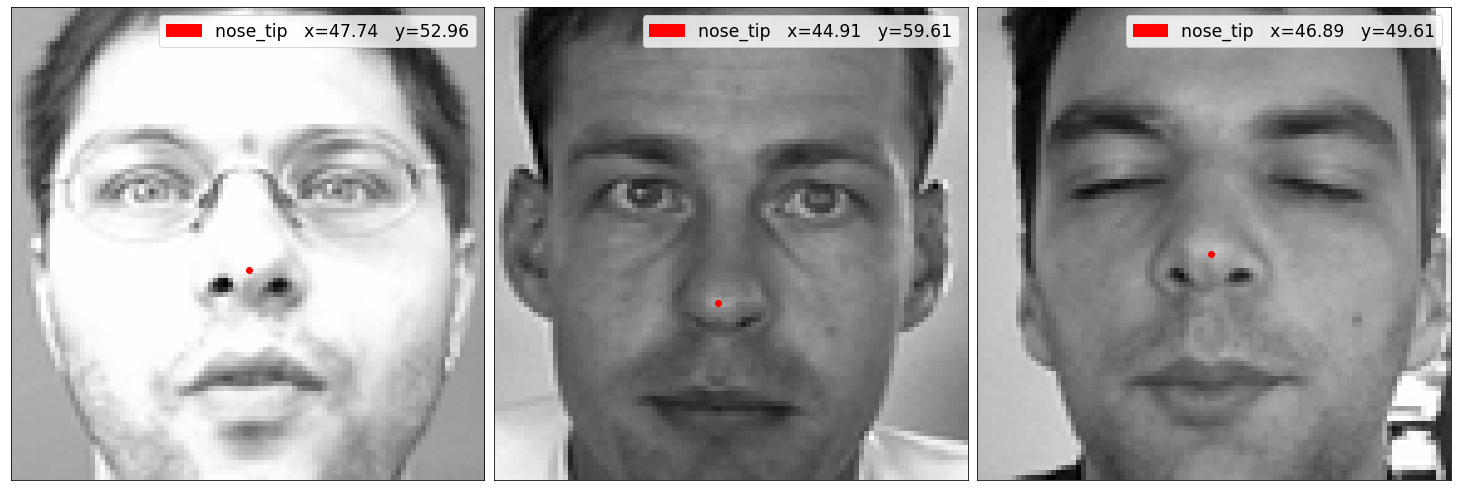

In [124]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.02, wspace=0.02)
x = 0
for i in range(3):
    x += 22
    fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    red_patch = mpatches.Patch(color='red', label='nose_tip   x='
                           + str(round(training.loc[x][20], 2)) 
                           +'   y=' + str(round(training.loc[x][21], 2)))
    plt.imshow(training['Image'][x], cmap='gray')
    plt.legend(handles=[red_patch], fontsize='xx-large')
    plt.plot(training.loc[x][20], training.loc[x][21], 'ro')
plt.show()

#### Visualizando os pontos referente a feature coordenadas do lábio inferior no centro da boca ou mouth_center_bottom_lip

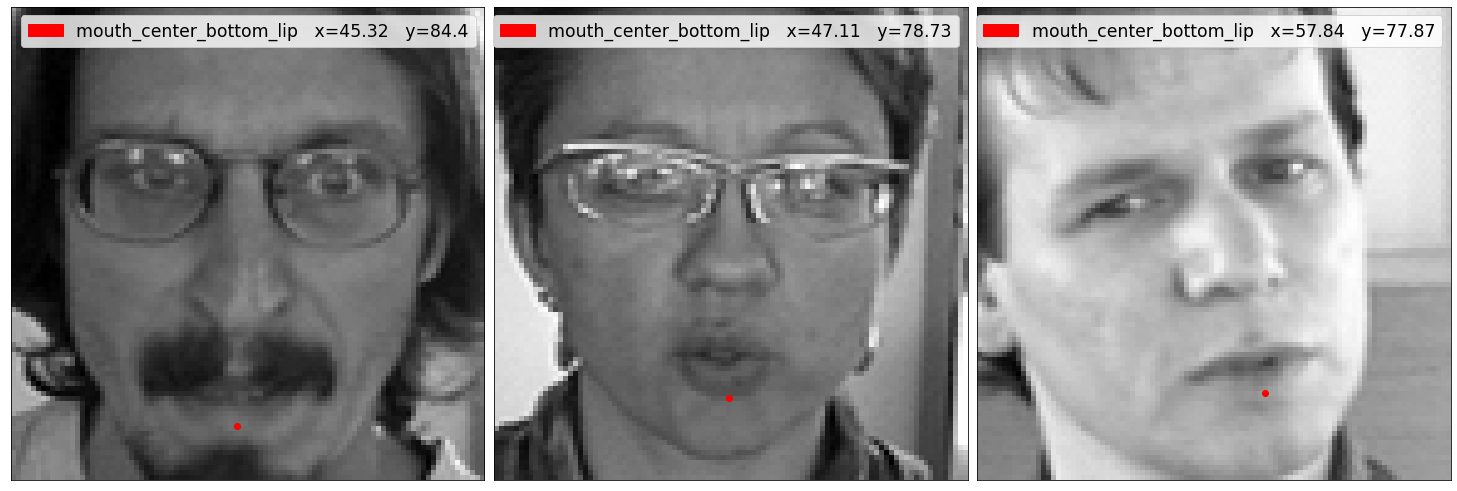

In [125]:
fig = plt.figure(figsize=(20, 20))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.02, wspace=0.02)
x = 0
for i in range(3):
    x += 34
    fig.add_subplot(1, 3, i + 1, xticks=[], yticks=[])
    red_patch = mpatches.Patch(color='red', label='mouth_center_bottom_lip   x='
                           + str(round(training.loc[x][28], 2)) 
                           +'   y=' + str(round(training.loc[x][29], 2)))
    plt.imshow(training['Image'][x], cmap='gray')
    plt.legend(handles=[red_patch], fontsize='xx-large')
    plt.plot(training.loc[x][28], training.loc[x][29], 'ro')
plt.show()

#### Visualizando as quarenta primeiras imagens e a plotagem dos pontos chaves faciais

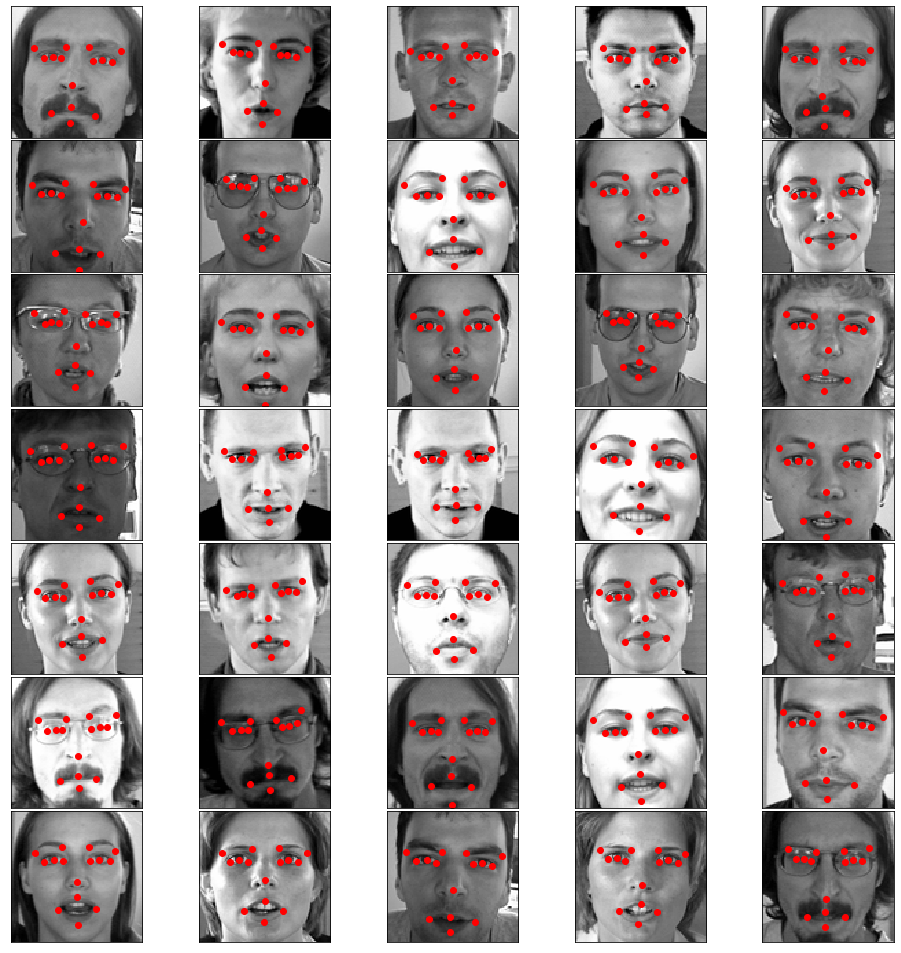

In [126]:
fig = plt.figure(figsize=(13, 13))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.02, wspace=0.02)

for i in range(35):
    fig.add_subplot(7, 5, i + 1, xticks=[], yticks=[])
    plt.imshow(training['Image'][i], cmap='gray')
    for j in range(1,31,2):
        plt.plot(training.loc[i][j-1], training.loc[i][j], 'ro')

plt.show()

#### Convertendo os dados da imagem em array e atribuindo para variável X

In [127]:
X = np.asarray([training['Image']], dtype=np.uint8).reshape(training.shape[0],96,96,1)

#### Cria um novo dataset chamado y, removendo a feature "Imagem"

In [128]:
y = training.drop(['Image'], axis=1)

#### Cria a variável y_ndarray convertendo a variável y para numpy.ndarray

In [129]:
y_ndarray = y.to_numpy()

#### Divide os dados do dataset em subconjuntos aleatórios de treino e teste

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y_ndarray, test_size=0.3, random_state=42)

#### Criação da variável do tipo sequential
https://keras.io/models/sequential/

In [131]:
model = Sequential()

#### Função para criar as camadas da rede neural convulacional
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Convolution2D: https://keras.io/layers/convolutional/#conv2d <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;LeakyReLU: https://keras.io/layers/advanced-activations/#leakyrelu <br/>
BatchNormalization: https://keras.io/layers/normalization/#batchnormalization <br/>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;MaxPool2D: https://keras.io/layers/pooling/#maxpooling2d
 

In [132]:
def create_layer(model, filters, maxpooling, *inputshape):
    if inputshape:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    else:
      if maxpooling:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
        model.add(MaxPool2D(pool_size=(2, 2)))
      else:
        model.add(Convolution2D(filters, (3,3), padding='same', use_bias=False))
        model.add(LeakyReLU(alpha = 0.1))
        model.add(BatchNormalization())
    

#### Cria a primeira camada com inut_shape

In [133]:
create_layer(model, 32, False, True)

#### Cria as camadas ocultas

In [134]:
create_layer(model, 32, True)
create_layer(model, 64, False)
create_layer(model, 64, True)
create_layer(model, 128, False)
create_layer(model, 128, True)
create_layer(model, 256, False)
create_layer(model, 256, True)
create_layer(model, 512, False)
create_layer(model, 512, True)

#### Cria as camadas ocultas

In [135]:
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))

#### Visualiza o resumo do modelo criado

In [136]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)       

#### Configura o modelo para treinamento

In [137]:
model.compile(optimizer='Adam', loss='mse', metrics=['mae'])

#### Treina o modelo para um número fixo de épocas (iterações em um conjunto de dados)

In [138]:
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
1498/1498 [==============================] - 204s 136ms/step - loss: 163.4740 - mae: 7.9514
Epoch 2/100
1498/1498 [==============================] - 192s 128ms/step - loss: 27.0313 - mae: 4.1076
Epoch 3/100
1498/1498 [==============================] - 193s 129ms/step - loss: 21.0494 - mae: 3.6117
Epoch 4/100
1498/1498 [==============================] - 190s 127ms/step - loss: 18.7970 - mae: 3.4133
Epoch 5/100
1498/1498 [==============================] - 191s 127ms/step - loss: 17.2195 - mae: 3.2791
Epoch 6/100
1498/1498 [==============================] - 192s 128ms/step - loss: 15.6443 - mae: 3.1077
Epoch 7/100
1498/1498 [==============================] - 191s 127ms/step - loss: 13.2333 - mae: 2.8571
Epoch 8/100
1498/1498 [==============================] - 191s 128ms/step - loss: 12.7777 - mae: 2.8018
Epoch 9/100
1498/1498 [==============================] - 197s 132ms/step - loss: 14.1844 - mae: 2.9473
Epoch 10/100
1498/1498 [==============================] - 199s 133ms/ste

In [139]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 6.620138949694292
Test accuracy: 2.1750845909118652


In [140]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [141]:
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)

In [142]:
test_res = model.predict(test_X)

In [144]:
train_predicts = model.predict(X_train)

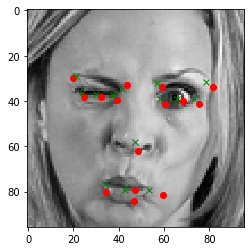

In [145]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

In [45]:
IdLookupTable

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
27119,27120,1783,right_eye_center_y,NaN
27120,27121,1783,nose_tip_x,NaN
27121,27122,1783,nose_tip_y,NaN
27122,27123,1783,mouth_center_bottom_lip_x,NaN


#### Retorna o valor da perda e os valores das métricas para o modelo no modo de teste

In [41]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 7.080679958854509
Test accuracy: 2.2738702297210693


#### 2 epocas

In [42]:
test['Image'] = test['Image'].apply(lambda x: np.fromstring(x, dtype=int, sep=' ').reshape((96,96)))

In [43]:
test_X = np.asarray([test['Image']], dtype=np.uint8).reshape(test.shape[0],96,96,1)

In [54]:
test_res = model.predict(test_X)

NameError: name 'model' is not defined

In [45]:
train_predicts = model.predict(X_train)

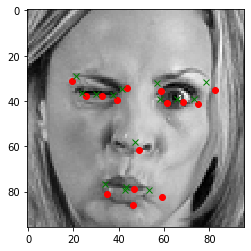

In [46]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

In [ ]:
50 epocas

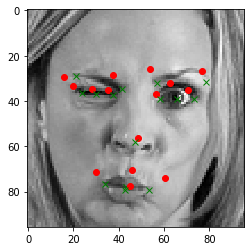

In [49]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

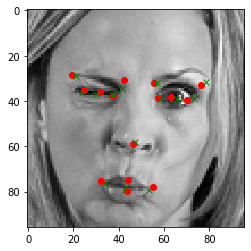

In [53]:
plt.imshow(X_train[0].reshape((96,96)), cmap='gray')

for i in range(1,31,2):
    plt.plot(train_predicts[0][i-1], train_predicts[0][i], 'ro')
    plt.plot(y_train[0][i-1], y_train[0][i], 'x', color='green')

plt.show()

In [54]:
header = list(y.columns)

In [53]:
#

In [55]:
test_predicts = pd.DataFrame(test_res, columns = header)

In [56]:
for i in range(IdLookupTable.shape[0]):
    IdLookupTable.Location[i] = test_predicts.loc[IdLookupTable.ImageId[i]-1][IdLookupTable.FeatureName[i]]

c:\users\alexandre\miniconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [57]:
SampleSubmission.Location = IdLookupTable.Location

In [58]:
SampleSubmission.to_csv('submission_50_epochs.csv', index=False)

In [51]:
test_predicts

NameError: name 'test_predicts' is not defined

In [50]:
IdLookupTable.head(500)

,RowId,ImageId,FeatureName,Location
0,1,1,left_eye_center_x,NaN
1,2,1,left_eye_center_y,NaN
2,3,1,right_eye_center_x,NaN
3,4,1,right_eye_center_y,NaN
4,5,1,left_eye_inner_corner_x,NaN
...,...,...,...,...
495,496,17,left_eyebrow_outer_end_y,NaN
496,497,17,right_eyebrow_inner_end_x,NaN
497,498,17,right_eyebrow_inner_end_y,NaN
498,499,17,right_eyebrow_outer_end_x,NaN
